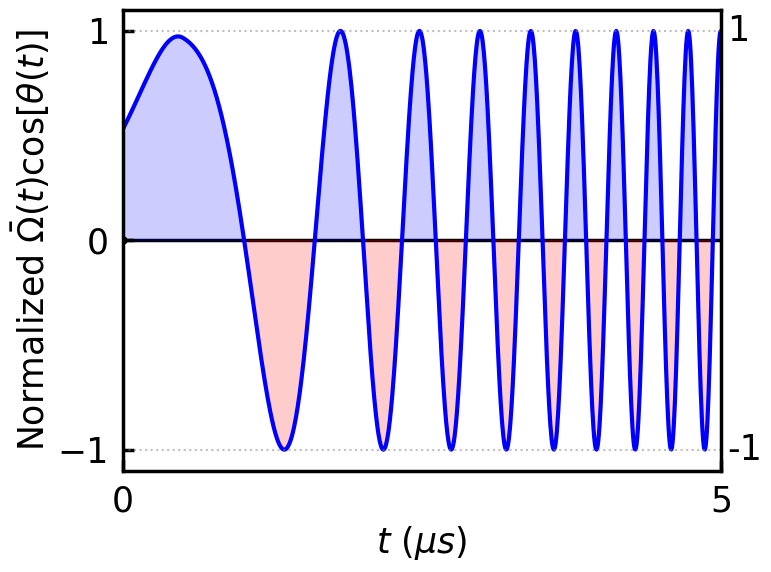

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import time
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 2.5  
mpl.rcParams['font.size'] = 16      

start_time = time.time()

def Omega_theta(t, T, t1, t2, r, r1, w, d):
    a = r*T*np.log(1/(np.exp((t-t1)/T) + np.exp(-(t-t1)/T))) + r1/T*t2/2*t - r*T*np.log(1/(np.exp((0-t1)/T) + np.exp(-(0-t1)/T)))
    b = r*T*np.log(1/(np.exp((t-t1-t2)/T) + np.exp(-(t-t1-t2)/T))) - r1/T*t2/2*(t-t2-t1)
    c = -r1/T*(t-t1-t2/2)**2/2 + r1/T*(-t2/2)**2/2
    e = r*T*np.log(1/(np.exp((t1-t1)/T) + np.exp(-(t1-t1)/T))) + r1/T*t2/2*t1- r*T*np.log(1/(np.exp((0-t1)/T) + np.exp(-(0-t1)/T)))
    d0 = r1/T*t2 - r*2*(np.exp((-t1)/T) - np.exp(-(-t1)/T))/(np.exp((-t1)/T) + np.exp(-(-t1)/T))
    if t < t1:
        x = 2*w/(np.exp((t-t1)/T) + np.exp(-(t-t1)/T))*2*(np.cos(-a+d0/2*t))
        return x
    elif t1 <= t < t1+t2:
        x = w*2*(np.cos(-(c+e)+d0/2*t))
        return x
    else:
        x = 2*w/(np.exp((t-t1-t2)/T) + np.exp(-(t-t1-t2)/T))*2*(np.cos(-(b+e)+d0/2*t))
        return x

def compute_and_plot_Omega_theta(T, t1, t2, r, r1, w, d, t_range):
    Omega_theta_values = [Omega_theta(t_val, T, t1, t2, r, r1, w, d) for t_val in t_range]
    return Omega_theta_values


T = 0.4
t1 = 0.5
t2 = 5
r = 1.5
w = 3
d = 0
r1 = 2  

t_range = np.linspace(0, 5, 1000)


Omega_theta_values = compute_and_plot_Omega_theta(T, t1, t2, r, r1, w, d, t_range)

max_Omega_theta = max(np.abs(Omega_theta_values))
normalized_Omega_theta = [v / max_Omega_theta for v in Omega_theta_values]


plt.figure(figsize=(8, 6))


plt.plot(t_range, normalized_Omega_theta, color='blue', linewidth=3)


plt.axhline(y=0, color='black', linewidth=2.5, zorder=1)


plt.fill_between(t_range, normalized_Omega_theta, 0, 
                 where=np.array(normalized_Omega_theta) >= 0, 
                 color='blue', alpha=0.2, interpolate=True)
plt.fill_between(t_range, normalized_Omega_theta, 0, 
                 where=np.array(normalized_Omega_theta) < 0, 
                 color='red', alpha=0.2, interpolate=True)


plt.xlim(0, 5)
plt.ylim(-1.1, 1.1)


plt.xticks([0, 5], fontsize=25)  
plt.yticks([-1, 0, 1], fontsize=25) 


plt.xlabel('$t$ ($\mu s$)', fontsize=25)
plt.ylabel(r'Normalized $\bar{\Omega}(t)\cos[\theta(t)]$', fontsize=25)
plt.grid(False)

ax = plt.gca()

ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

ax.spines['top'].set_linewidth(2.5)
ax.spines['right'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)

ax.tick_params(
    axis='both', 
    which='major', 
    direction='in', 
    length=8,         
    width=2.5,       
    pad=10,
    labelsize=25
)
ax.tick_params(axis='both', which='minor', length=0)


plt.axhline(y=1, color='gray', linestyle=':', alpha=0.5)
plt.axhline(y=-1, color='gray', linestyle=':', alpha=0.5)


plt.text(5.05, 1, '1', fontsize=25, verticalalignment='center', ha='left')
plt.text(5.05, -1, '-1', fontsize=25, verticalalignment='center', ha='left')


ax.plot(0, 0, 'o', color='black', markersize=5, zorder=3)

plt.tight_layout()
plt.show()

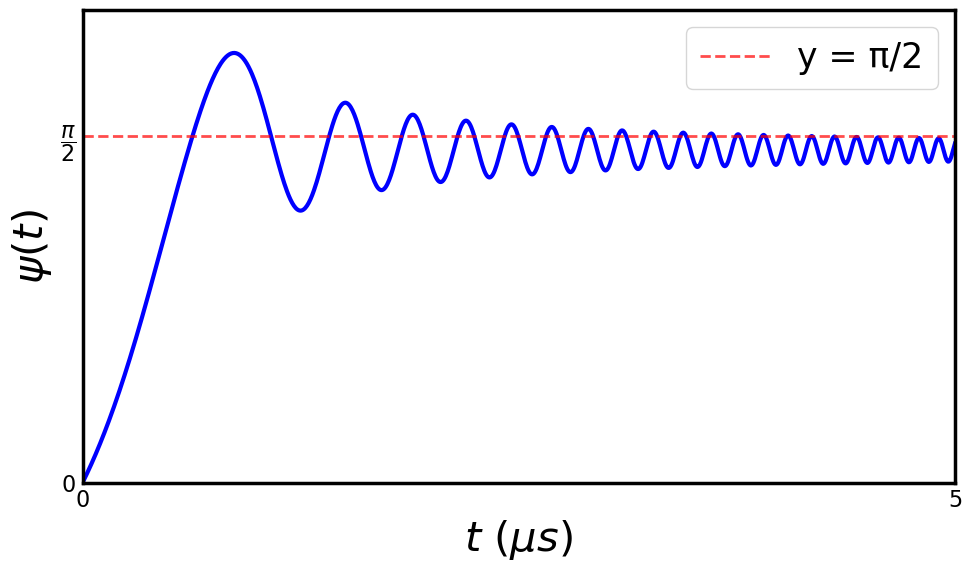

总计算时间: 7.19秒


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import time
import matplotlib as mpl


mpl.rcParams['axes.linewidth'] = 2.5  
mpl.rcParams['font.size'] = 16       

start_time = time.time()


def psi(t, T, t1, t2, r, r1, w, d):
    a = r*T*np.log(1/(np.exp((t-t1)/T) + np.exp(-(t-t1)/T))) + r1/T*t2/2*t - r*T*np.log(1/(np.exp((0-t1)/T) + np.exp(-(0-t1)/T)))
    b = r*T*np.log(1/(np.exp((t-t1-t2)/T) + np.exp(-(t-t1-t2)/T))) - r1/T*t2/2*(t-t2-t1)
    c = -r1/T*(t-t1-t2/2)**2/2 + r1/T*(-t2/2)**2/2
    e = r*T*np.log(1/(np.exp((t1-t1)/T) + np.exp(-(t1-t1)/T))) + r1/T*t2/2*t1- r*T*np.log(1/(np.exp((0-t1)/T) + np.exp(-(0-t1)/T)))
    d0 = r1/T*t2 - r*2*(np.exp((-t1)/T) - np.exp(-(-t1)/T))/(np.exp((-t1)/T) + np.exp(-(-t1)/T))
    if t < t1:
        x = 2*w/(np.exp((t-t1)/T) + np.exp(-(t-t1)/T))*2*(np.cos(-a+d0/2*t))
        return x
    elif t1 <= t < t1+t2:
        x = w*2*(np.cos(-(c+e)+d0/2*t))
        return x
    else:
        x = 2*w/(np.exp((t-t1-t2)/T) + np.exp(-(t-t1-t2)/T))*2*(np.cos(-(b+e)+d0/2*t))
        return x

def compute_and_plot(T, t1, t2, r, r1, w, d, t_range):
    integral_values = []

    # Caculate(∫ cos(\theta(t')) dt')
    for t_val in t_range:
        integral_value, _ = quad(psi, 0, t_val, args=(T, t1, t2, r, r1, w, d))
        integral_values.append(integral_value / 2)
    
    return integral_values

T = 0.4
t1 = 0.5
t2 = 5
r = 1.5
w = 3
d = 0
r1 = 2 

t_range = np.linspace(0, 5, 1000)

integral_values_r1 = compute_and_plot(T, t1, t2, r, 5, w, d, t_range)

plt.figure(figsize=(10, 6))

plt.plot(t_range, integral_values_r1, color='blue', linewidth=3)


pi_over_2 = np.pi / 2
plt.axhline(y=pi_over_2, color='red', linestyle='--', linewidth=2, alpha=0.7, label='y = π/2')

plt.xlim(0, 5)
plt.ylim(0, max(sin_values_r1) * 1.1)


plt.xticks([0, 5], fontsize=25)  
plt.yticks([0, pi_over_2], ['0', r'$\dfrac{\pi}{2}$'], fontsize=25)  

plt.xlabel('$t$ ($\mu s$)', fontsize=30)
plt.ylabel('$\psi(t)$', fontsize=30)


plt.legend(fontsize=25, loc='upper right')
plt.grid(False)


ax = plt.gca()


ax.spines['top'].set_linewidth(2.5)
ax.spines['right'].set_linewidth(2.5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)


ax.tick_params(axis='both', which='major', direction='in', length=0, width=0, pad=10)
ax.tick_params(axis='both', which='minor', length=0)


ax.spines['left'].set_position('zero')      
ax.spines['bottom'].set_position('zero')   



ax.xaxis.set_tick_params(which='both', pad=5)
ax.yaxis.set_tick_params(which='both', pad=5)

plt.tight_layout()
plt.savefig('psi_function.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"总计算时间: {time.time()-start_time:.2f}秒")